In [1]:
import tensorflow as tf
import os
import numpy

2025-05-20 20:58:03.333275: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 20:58:06.411010: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 20:58:08.528774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747763890.602110    5399 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747763891.102113    5399 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747763894.320747    5399 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
data_dir = "../data/raw"
img_size = (256, 256)
batch_size = 32
seed = 123

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = seed,
    image_size = img_size,
    batch_size = batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = seed,
    image_size = img_size,
    batch_size = batch_size
)

class_names = train_ds.class_names
print("Classes : ", class_names)

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y : (normalization_layer(x), y))


Found 4684 files belonging to 3 classes.
Using 3748 files for training.


2025-05-20 20:59:44.920890: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 4684 files belonging to 3 classes.
Using 936 files for validation.
Classes :  ['Bacterialblight', 'Brownspot', 'Leafsmut']


In [3]:
from tensorflow import keras

base_model = keras.applications.MobileNetV2(
    input_shape=(256, 256, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Pour commencer, on ne "fine-tune" pas

model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(len(class_names), activation='softmax')
])


/tmp/ipykernel_5399/2701523284.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(


In [4]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


2025-05-20 20:59:55.693852: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25165824 exceeds 10% of free system memory.
2025-05-20 20:59:56.192130: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25165824 exceeds 10% of free system memory.
2025-05-20 20:59:56.356335: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2025-05-20 20:59:57.248073: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25165824 exceeds 10% of free system memory.
2025-05-20 20:59:58.124596: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25165824 exceeds 10% of free system memory.


118/118 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.7178 - loss: 0.6598 - val_accuracy: 0.8910 - val_loss: 0.2970
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.9356 - loss: 0.2205 - val_accuracy: 0.9284 - val_loss: 0.2026
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.9693 - loss: 0.1392 - val_accuracy: 0.9594 - val_loss: 0.1460
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.9842 - loss: 0.1007 - val_accuracy: 0.9722 - val_loss: 0.1142
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.9933 - loss: 0.0762 - val_accuracy: 0.9808 - val_loss: 0.0902
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9971 - loss: 0.0599 - val_accuracy: 0.9850 - val_loss: 0.0768
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.9986 - loss: 0.0472 - val_accuracy: 0.9882 - val_loss: 0.0653
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9983 - loss: 0.0382 - val_accuracy: 0.989

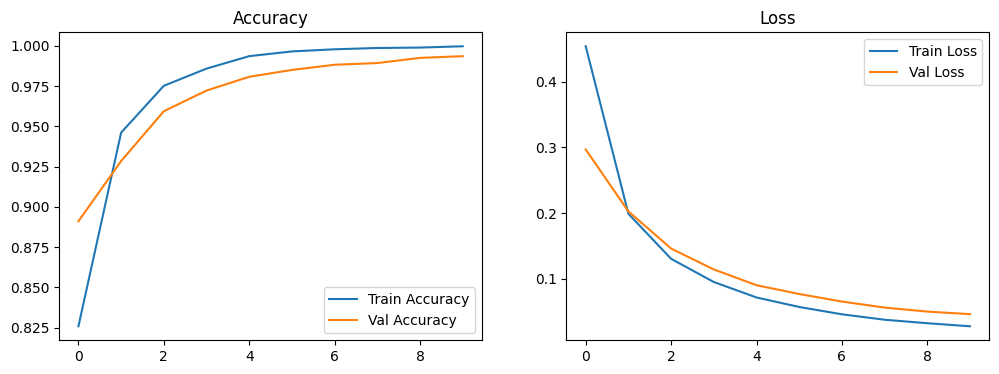

In [7]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()